In [3]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\girim\Downloads\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.describe().isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,False,False,False,False,False,False,False,False
mean,False,False,False,False,False,False,False,False
std,False,False,False,False,False,False,False,False
min,False,False,False,False,False,False,False,False
25%,False,False,False,False,False,False,False,False
50%,False,False,False,False,False,False,False,False
75%,False,False,False,False,False,False,False,False
max,False,False,False,False,False,False,False,False


In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
df.count()

Channel             440
Region              440
Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicassen          440
dtype: int64

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

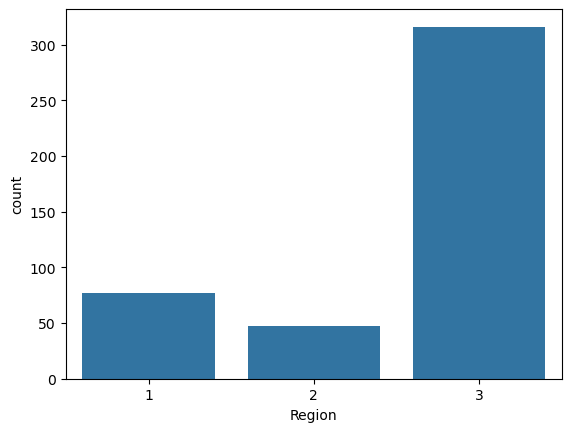

In [11]:
sns.countplot(x=df['Region'])
plt.show()

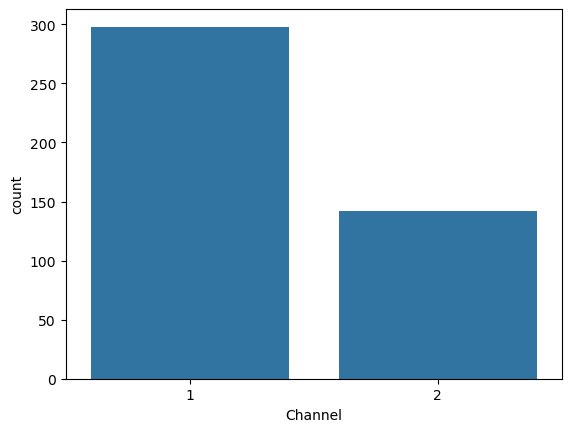

In [12]:
sns.countplot(x=df['Channel'])
plt.show()

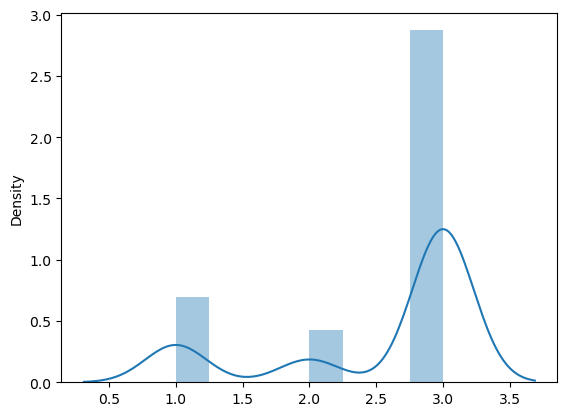

In [13]:
sns.distplot(x=df['Region'])
plt.show()

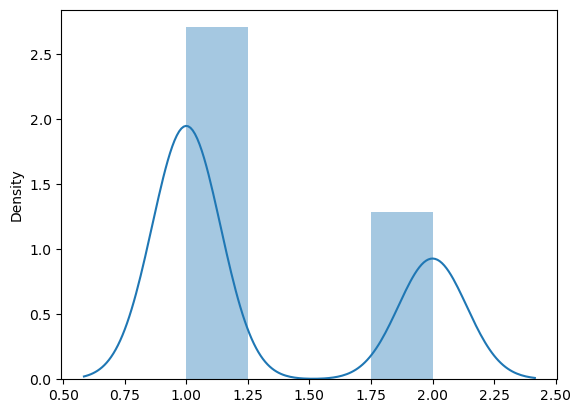

In [14]:
sns.distplot(x=df['Channel'])
plt.show()

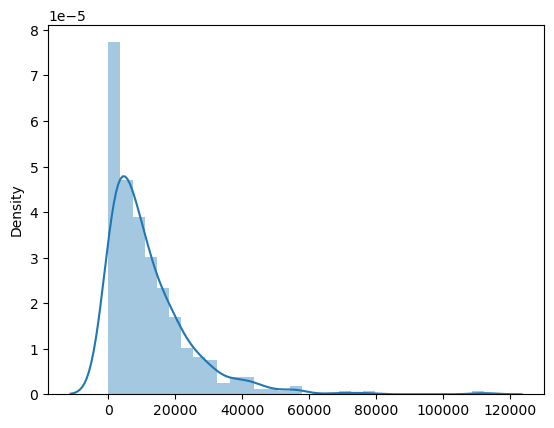

In [15]:
sns.distplot(x=df['Fresh'])
plt.show()

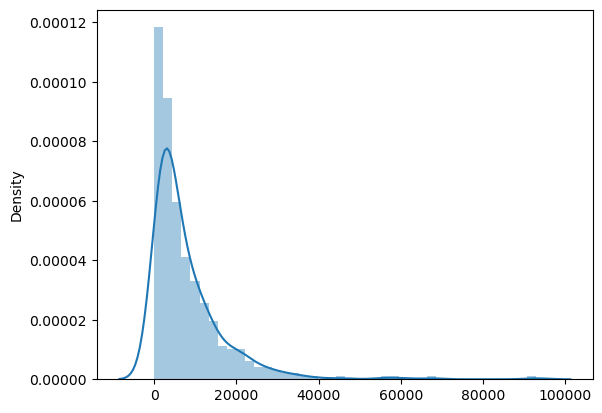

In [16]:
sns.distplot(x=df['Grocery'])
plt.show()

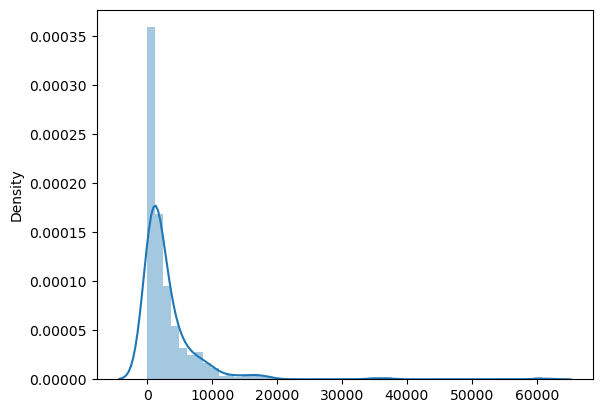

In [17]:
sns.distplot(x=df['Frozen'])
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc

MinMaxScaler()

In [19]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X=stscaler.fit_transform(df)

In [20]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [21]:
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [22]:
import scipy.cluster.hierarchy as sch

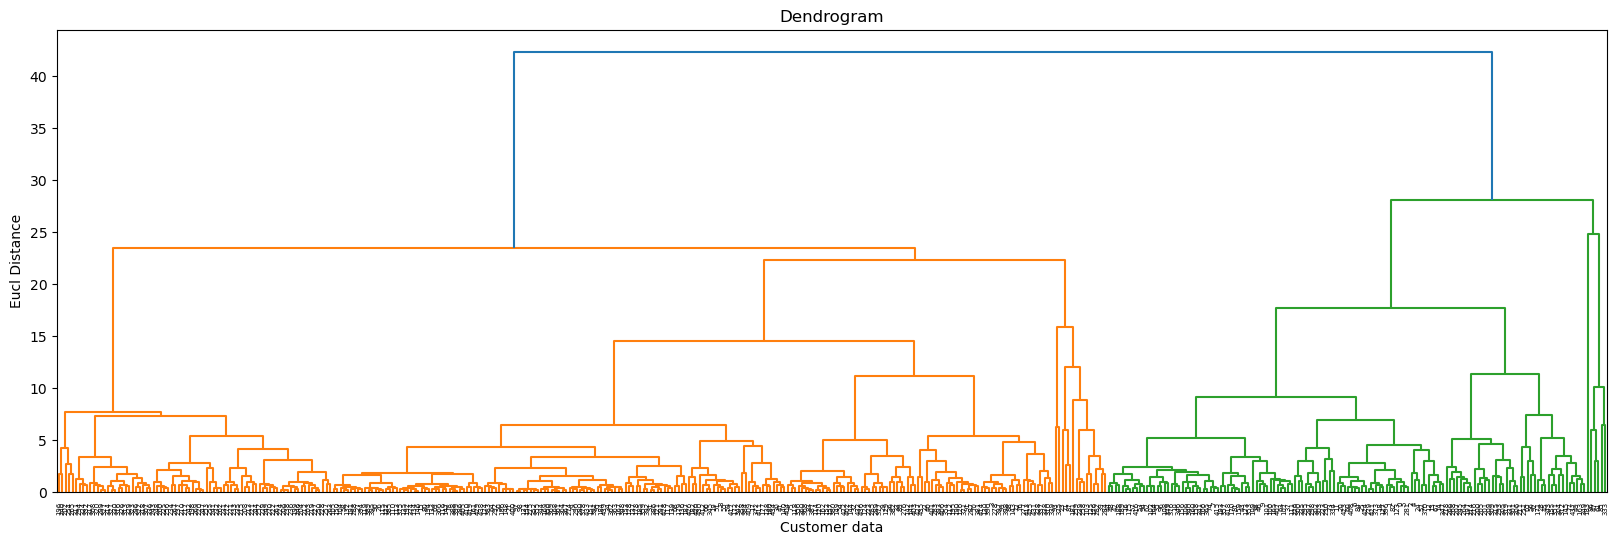

In [23]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [24]:
len(set(dendo['color_list']))

3

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
model = AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(X)

In [27]:
cluster

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [28]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [29]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,2
...,...
435,1
436,1
437,2
438,1


In [30]:
pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [31]:
cust_group_data=pd.concat([df,group_num],axis=1)
cust_group_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [32]:
# Model Evaluation
from sklearn.metrics import silhouette_score
# Check how well your model is making cluster
silhouette_score(X,cluster)

0.3600234023958461

In [33]:
cluster.shape

(440,)

''K means''

In [35]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [36]:
wcss

[2600.3756482224417,
 2149.283956221759,
 1851.8408722743848,
 1567.4493550056047,
 1446.4349586356464,
 1189.4373315150992,
 1146.3938222781735,
 1082.6398816370167,
 969.1934595642861]

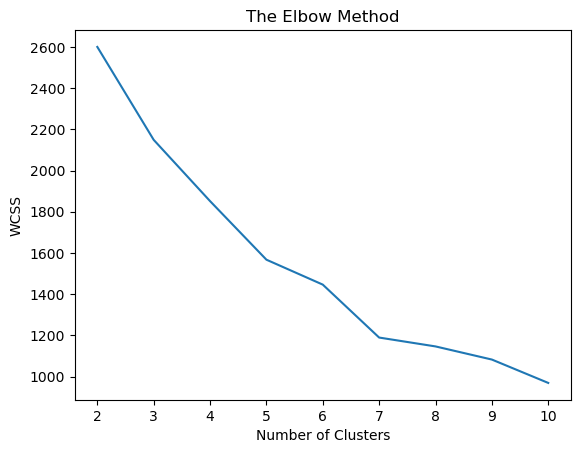

In [37]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
model=KMeans(n_clusters=4,random_state=42)
groups=model.fit_predict(X)
print(groups)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 2 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 2 0 0 1 1 0 0 1 1 2 0 1 1 0 2 0 0 1 2 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 2 2 1 1 1 1 1 2 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 2 1 2 1
 1 1 1 0 0 1 1 1 0 1 1 3 0 3 3 0 0 3 3 3 0 3 3 3 0 3 2 3 3 0 3 0 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 0 3 0 3 3 3 3 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 3 0
 3 0 0 3 0 0 0 0 0 0 0 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3
 2 3 0 3 3 3 3 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [46]:
groups.shape

(440,)

In [54]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num        

,Group
0,0
1,0
2,0
3,1
4,0
...,...
435,1
436,1
437,0
438,1


In [58]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


In [60]:
silhouette_score(X,groups)

0.34819485747460033